## Комментарий наставника
Привет, Иван! Меня зовут Александр и я буду проверять твой проект. Спасибо за твою работу:) Далее по ходу работы я оставлю свои комментарии и предложения. Постарайся их учесть в этом и дальнейших проектах. Комментарии ты можешь найти в текстовой ячейке с заголовком «Комментарий наставника» (как здесь) либо в ячейках с кодом в следующем виде: «#Комментарий наставника: <сам комментарий>». \
Часть комментариев может быть выделена цветом: \
<span style="color:green">Зелёный цвет символизирует, что всё отлично.</span> \
<span style="color:orange">Оранжевый цвет символизирует рекомендации.</span> \
<span style="color:red">Красный цвет символизирует недочёты.</span> \
<span style="color:blue">Синим цветом отмечен итоговый комментарий.</span>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных

Данные находятся в файле /datasets/Churn.csv

Признаки
* 		RowNumber — индекс строки в данных
* 		CustomerId — уникальный идентификатор клиента
* 		Surname — фамилия
* 		CreditScore — кредитный рейтинг
* 		Geography — страна проживания
* 		Gender — пол
* 		Age — возраст
* 		Tenure — количество недвижимости у клиента
* 		Balance — баланс на счёте
* 		NumOfProducts — количество продуктов банка, используемых клиентом
* 		HasCrCard — наличие кредитной карты
* 		IsActiveMember — активность клиента
* 		EstimatedSalary — предполагаемая зарплата

Целевой признак
* 		Exited — факт ухода клиента


### План работы

1 Подготовка данных
- знакомство с данными
- необходимая предобработка
- подготовка наборов данных для обучения валидации и тестирования

2 Исследование задачи 

- определение базовой модели

- Применение моделей классификаторов без учета дисбаланса классов

Расчет метрик для:

- логистической регрессии
- решающего дерева
- случайного леса

3 Борьба с дисбалансом

- учет весов классов
- искуственное изменение соотношений классов в обучающей выборке
- подбор наилучшей модели с учетом дисбаланса и поиском оптимальных значений гиперпараметров

4 Тестирование финальной модели

## Комментарий наставника
<span style="color:green">Отличный план, можно приступать к работе.</span>

# 1. Подготовка данных

Загрузим необходимые библиотеки и модули

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Загрузим данные:

In [2]:
#df = pd.read_csv('./datasets/Churn.csv')
df = pd.read_csv('/datasets/Churn.csv')

получим общую информацию:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4280,4281,15740527,Lai,766,Germany,Female,62,7.0,142724.48,1,0,1,5893.23,1
5905,5906,15731519,Kerr,511,France,Female,30,5.0,0.00,2,1,0,143994.86,0
8461,8462,15758769,Coffey,625,France,Female,44,7.0,0.00,1,1,0,4791.80,0
630,631,15712403,McMillan,589,France,Female,61,1.0,0.00,1,1,0,61108.56,1
3822,3823,15626985,Yefremova,850,France,Female,39,NaN,104386.53,1,1,0,105886.77,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Данные о клиентах содержат 10000 уникальных записей 12 признаков и 1 целевой "факт ухода". Есть категорийные "Geography", "Gender" и численные признаки. Признак Tenure содержит порядка 10% процентов пропусков. Названия переменных содержат символы верхнего и нижнего регистра.

Признаки "индекс строки в данных","уникальный идентификатор клиента" и "фамилия" не имеют значения для решения нашей задачи.
Поэтому просто удалим их:

## Комментарий наставника
<span style="color:orange">Всё так, только у нас не 12 признаков обучения, а 13 и 1 целевой.</span>

In [8]:
df =  df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

## Комментарий наставника
<span style="color:green">Согласен с решением.</span>

__Сделаем названия оставшихся переменных строчными__

In [9]:
df.columns = df.columns.str.lower()

Снизили вероятность ошибки при ручном вводе названия признака

__Обработка пропусков в столбце tenure__

Посмотрим есть ли связь между количеством недвижимости , возрастом, размером депозита и доходом вкладчика

In [10]:
columns=df[['age','tenure','balance','estimatedsalary']]

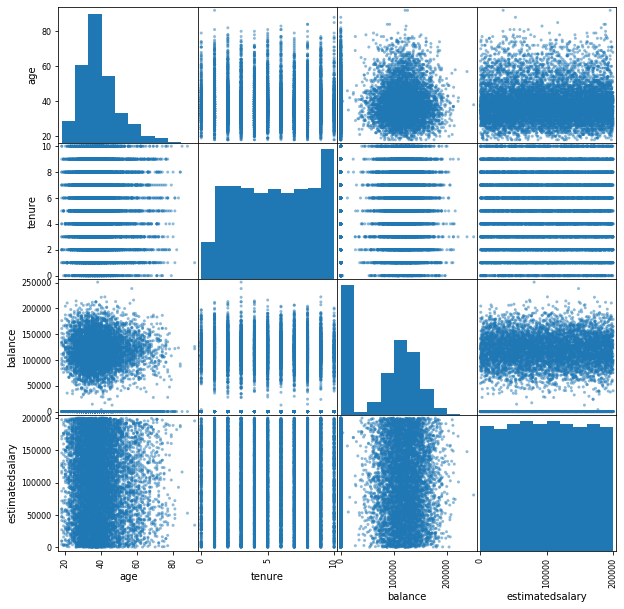

In [11]:
pd.plotting.scatter_matrix(columns, figsize=(10, 10));

In [12]:
columns.corr().round(2)

,age,tenure,balance,estimatedsalary
age,1.00,-0.01,0.03,-0.01
tenure,-0.01,1.00,-0.01,0.01
balance,0.03,-0.01,1.00,0.01
estimatedsalary,-0.01,0.01,0.01,1.00


сильные взаимосвязи, позволившие бы заполнить пропуски по аналогии, не обнаружены. Поэтому мы удалим строки, содержащие пропуски:

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(9091, 11)

## Комментарий наставника
<span style="color:orange">В таких случаях лучше просто заполнить пропуски нулём (предположим, что у клиента нет объектов недвижимости, раз не указано обратное) или медианой по датасету. Это позволит нам сохранить данные путём, возможно, небольшого искажения информации.</span>

__Выделим целевой признак и зависимые переменные__

In [15]:
features=df.drop('exited', axis=1)

In [16]:
target=df['exited']

Посмотрим как распределены значения по классам в процентном отношении:

In [17]:
classes = target.values 
counter = Counter(classes) 
for k,v in counter.items(): 
    per = v / len(classes) * 100 
    print('Класс=%d, Число значений=%d, Процент=%.2f%%' % (k, v, per))

Класс=1, Число значений=1854, Процент=20.39%
Класс=0, Число значений=7237, Процент=79.61%


Классы не сбалансированы. Это нужно учесть в дальнейшем при подготовке выборок и работе по подбору моделей

## Комментарий наставника
<span style="color:green">Верно, дисбаланс значительный.</span>

__Кодирование категориальных переменных__

In [18]:
features= pd.get_dummies(features, columns = ['geography', 'gender'], drop_first = True)
features.sample(5)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
5574,503,36,9.0,0.00,2,1,1,16274.67,0,1,0
6544,709,45,3.0,104118.50,1,0,1,174032.00,0,0,0
1571,594,23,5.0,156267.59,1,1,0,160968.44,0,0,1
8825,611,49,9.0,115488.52,2,1,1,138656.81,1,0,0
93,769,29,8.0,0.00,2,1,1,172290.61,0,0,1


## Комментарий наставника
<span style="color:green">Признаки закодировали, прекрасно.</span>

In [19]:
numeric=['creditscore','age','tenure','balance','estimatedsalary']
scaler = StandardScaler()
scaler.fit(features[numeric])
features[numeric] = scaler.transform(features[numeric])


## Комментарий наставника
<span style="color:orange">Применяй масштабирование уже после того, как разбил датасет на выборки. Это нужно для того, чтобы обучать (с помощью метода **fit**) Scaler на тренировочной выборке, а после этого уже трансформировать (с помощью **transform**) все выборки (включая и тренировочную). Применяя такой подход, мы сможем получить более справедливую оценку модели на валидационной/тестовой выборках. Подробнее см. по ссылке в блоке «**Data transformation with held out data**»: https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics.</span>

__Деление данных на обучающую, валидационную и тестовую выборки__

для разбиения данных на выборки используем стандартную функцию train_test_split из библиотеки scikit_learn Разбиение в соотношении 7:1,5:1,5 для обучающей, валидационной и тестовой выборок. Поскольку мы имеем дисбаланс классов, то задаем условия разбиения с параметром stratify, позволящим сохранить соотношения классов во всех выборках для целевой переменной

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)

In [21]:
X_train.shape, X_val.shape, X_test.shape

((3181, 11), (3182, 11), (2728, 11))

## Комментарий наставника
<span style="color:orange">А вот так не надо поступать. Ты оставил очень уж мало данных для обучения, советую оставлять не менее 60% от всего датасета, у тебя тут явно менее. Основной выборкой всегда является именно тренировочная, ведь модели мы обучаем на ней, поэтому она должна быть явно больше по объёму, чем валидационная или тестовая.</span>

### Выводы
Данные о клиентах содержат 10000 уникальных записей 12 признаков и 1 целевой "факт ухода". 
В ходе подготовки данных были удалены не релевантные  признаки и строки с пропусками. 
Было проведено one_hot кодирование категорийных признаков с учетом избыточности.
Численные переменные стандартизованы.
Датасет разделен на зависимые и целевой признаки.
Для целей обучения проверки и тестирования датасеты были разделены на 3 части в соотношениях 7:1,5:1,5
- 

## Комментарий наставника
<span style="color:green">Вопросов нет, переходим к исследованию задачи.</span>

# 2. Исследование задачи

__Создание базовой классификационной модели__

Общепринятая мера результативности классификатора-показатель того, насколько он лучше чем случайное угадывание.
Построим нашу базовую модель "baseline_clf" на основе фиктивного классификатора DummyClassifier, выполняющего отнесение к классам на основе простых правил. Выбор значения параметра strategy='stratified' означает, что отнесение наблюдения к тому или иному классу пропорциональны долям классов в выборке.
Построим и обучим на его основе нашу базовую модель:

In [22]:
baseline_clf = DummyClassifier(strategy='stratified',random_state=12345)
baseline_clf.fit(X_train, y_train)
baseline_predict=baseline_clf.predict(X_val)
pred_prob = baseline_clf.predict_proba(X_val)[:,1]
accuracy_score(y_val,baseline_predict) #Комментарий наставника: лишняя строка кода получилась
print(baseline_clf)
print('accuracy: ', accuracy_score(y_val,baseline_predict))
print('roc_auc:  ', roc_auc_score(y_val, pred_prob))
print('f1:       ', f1_score(y_val,baseline_predict))

DummyClassifier(constant=None, random_state=12345, strategy='stratified')
accuracy:  0.6731615336266499
roc_auc:   0.4978846255619962
f1:        0.20122887864823352


## Комментарий наставника
<span style="color:green">За константную модель +!</span>

__Оценка применимости различных моделей классификации__

Оценим  различные классификаторы с параметрами, заданными по умолчанию. В качестве критерия оценки будем использовать значения __accuracy_score, roc_auc_score и f1__


In [23]:
models = [LogisticRegression(random_state=12345, solver='liblinear'),
          DecisionTreeClassifier( random_state=12345), 
          RandomForestClassifier( random_state=12345)]

for model in models:
    model.fit(X_train, y_train)
    pred_valid = model.predict(X_val)
    pred_prob = model.predict_proba(X_val)[:, 1]
    print(model)
    print('accuracy: ', accuracy_score(y_val, pred_valid))
    print('roc_auc:  ', roc_auc_score(y_val, pred_prob))
    print('f1:       ', f1_score(y_val, pred_valid))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
accuracy:  0.8086109365179133
roc_auc:   0.7579604079768018
f1:        0.29595375722543354
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
accuracy:  0.798240100565682
roc_auc:   0.6962091151803892
f1:        0.5143721633888049
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
       

## Комментарий наставника
<span style="color:green">Здорово, что используешь цикл. Очень компактно всё получилось.</span>

### Выводы
В рамках исследования задачи была определена базовая классификационная модель, результат предсказания которой зависит лишь от соотношения классов в целевой переменной. Рачитанные на ее основе метрики дают нам возможность проверить адекватность используемых классификаторов.

Для решения задачи оттока клиентов были выбраны три классификационные модели:
- логистическая регрессия
- решающее дерево
- случайный лес

Все три классификатора  с параметрами, заданными по умолчанию, и без учета дисбаланса классов показали лучший результат по сравнению с базовой классификационной моделью. Значение ROC_AUC параметра больше 0.5 для базового классификатора.

Пренебрежение несбалансированностью классов не дало возможности построить модель с значением F1 меры, приближающейся к пороговой (0.59)

## Комментарий наставника
<span style="color:green">Всё верно, идём далее.</span>

# 3. Борьба с дисбалансом

__Учет весов для классов__

Для всех наших классификаторов применим параметр class weight=balanced, учтывающий веса классов

In [24]:
models = [LogisticRegression(random_state=12345, solver='liblinear',class_weight = 'balanced'),
          DecisionTreeClassifier( random_state=12345,class_weight = 'balanced'), 
          RandomForestClassifier( random_state=12345,class_weight = 'balanced')]

for model in models:
    model.fit(X_train, y_train)
    pred_valid = model.predict(X_val)
    pred_prob = model.predict_proba(X_val)[:, 1]
    print(model)
    print('accuracy: ', accuracy_score(y_val, pred_valid))
    print('roc_auc:  ', roc_auc_score(y_val, pred_prob))
    print('f1:       ', f1_score(y_val, pred_valid))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
accuracy:  0.7058453802639849
roc_auc:   0.7607427868925256
f1:        0.48627881448957183
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
accuracy:  0.7856693903205532
roc_auc:   0.6757068635460306
f1:        0.4825493171471927
RandomForestClassifier(bootstrap=True, class_weight='balanced',
      

Значение f1 метрики сильно возросла для логистической регрессии, но понизилась для классификатора случайного леса, по сравнению с результатами моделей без учета дисбаланса. Метрика roc_auc намного выше у всех классификаторов по сравнению с базовой моделью, то есть доля правильно классифицированных объектов выше нежели чем при случайном выборе. Модели вполне адекватны.

## Комментарий наставника
<span style="color:green">На взвешивание классов посмотрели, оценки по всем нужным метрикам есть.</span>

__Увеличение размера редкого класса__

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    return shuffle(features_upsampled, target_upsampled, random_state=12345)



In [26]:
X_train_up, y_train_up = upsample(X_train, y_train, 3)

In [27]:
models = [LogisticRegression(random_state=12345, solver='liblinear'),
          DecisionTreeClassifier( random_state=12345), 
          RandomForestClassifier( random_state=12345)]

for model in models:
    model.fit(X_train_up, y_train_up)
    pred_valid = model.predict(X_val)
    pred_prob = model.predict_proba(X_val)[:, 1]
    print(model)
    print('accuracy: ', accuracy_score(y_val, pred_valid))
    print('roc_auc:  ', roc_auc_score(y_val, pred_prob))
    print('f1:       ', f1_score(y_val, pred_valid))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
accuracy:  0.7520427404148334
roc_auc:   0.7603869295104314
f1:        0.49520153550863716
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
accuracy:  0.7969830295411691
roc_auc:   0.687970256405889
f1:        0.5030769230769231
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
       

## Комментарий наставника
<span style="color:green">К upsampling тоже нечего добавить.</span>

__Уменьшение размера данных большего класса__

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [29]:
X_train_down, y_train_down = downsample(X_train, y_train, 0.6)

## Комментарий наставника
<span style="color:orange">К downsampling можно было бы подобрать лучший коэффициент, который позволил бы ещё больше сбалансировать наши классы. Подумай, во сколько раз нужно уменьшить число объектов наиболее представленного в датасете класса, чтобы нивелировать дисбаланс и привести соотношение классов примерно к 1:1?</span>

In [30]:
models = [LogisticRegression(random_state=12345, solver='liblinear'),
          DecisionTreeClassifier( random_state=12345), 
          RandomForestClassifier( random_state=12345)]

for model in models:
    model.fit(X_train_down, y_train_down)
    pred_valid = model.predict(X_val)
    pred_prob = model.predict_proba(X_val)[:, 1]
    print(model)
    print('accuracy: ', accuracy_score(y_val, pred_valid))
    print('roc_auc:  ', roc_auc_score(y_val, pred_prob))
    print('f1:       ', f1_score(y_val, pred_valid))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)
accuracy:  0.7985543683218101
roc_auc:   0.7588047328423515
f1:        0.4178019981834696
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
accuracy:  0.754242614707731
roc_auc:   0.6914947652466639
f1:        0.49286640726329445
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
       

Учет дисбаланса классов в общем случае ведет к улучшению качества предсказаний

## Комментарий наставника
<span style="color:orange">Советую пробовать для каждого метода подбирать параметры к моделям. Далеко не факт, что модель с подобранными параметрами под лучший метод борьбы с дисбалансом окажется лучшей вообще.</span>

__Подбор параметров для "наилучшей модели__

До сих пор мы обучали и тестировали модели классификации с параметрами, заданными по умолчанию. Теперь попробуем найти "лучшую" модель путем подбора параметров методом случайного поиска по пространству признаков. Границы значений для гиперпараметров зададим в переменной param_dist. Для учета дисбаланса учтем соотношение классов добавлением параметра  class_weight='balanced'

In [31]:
model_RF=RandomForestClassifier( random_state=12345,class_weight='balanced')

In [32]:
param_dist = {"max_depth": sp_randint(2, 11),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": sp_randint(10, 101)
             }

In [33]:
n_iter_search = 40
random_search = RandomizedSearchCV(model_RF, param_distributions=param_dist,
                                   n_iter=n_iter_search)

## Комментарий наставника
<span style="color:green">Интересное решение с рандомизированным подбором параметров, молодец!</span>

In [34]:
random_search.fit(X_train_down, y_train_down)
pred_valid = random_search.predict(X_val)
pred_prob = random_search.predict_proba(X_val)[:, 1]
print(random_search)
print('accuracy: ', accuracy_score(y_val, pred_valid))
print('roc_auc:  ', roc_auc_score(y_val, pred_prob))
print('f1:       ', f1_score(y_val, pred_valid))

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    

## Комментарий наставника
<span style="color:orange">Кросс-валидацию не совсем верно здесь применять по следующей причине: на каждом фолде (итерации) наша выборка делится на 2 непересекающиеся части: малую тренировочную и валидационную. Так вот валидационная часть (как и валидационная/тестовая выборки) должна оставаться нетронутой и отражать ситуацию с данными «как есть». Но мы применили downsampling ко всей кросс-валидационной выборке, поэтому это условие нарушено. Из-за этого подбор модели встроенными средствами sklearn не совсем корректен. Здесь либо писать свою реализацию кросс-валидации, либо оценивать модель и подбирать параметры с помощью валидационной выборки.</span>

Получим параметры для "лучшей" модели

In [35]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)

### Выводы

Изучена влияние  различных методов учета дисбаланса классов на конечный результат. Судя по значениям метрик:
-для логистической регрессии и дерева решений все примененные  методы учета дисбаланса улучшают качество предсказаний. Для случайного леса введение весов классов оказывает негативное влияние на результат. В то же время искуственное увеличение данных минорного класса или уменьшение в обучающей выборке данных для для большего класса положительно влияет на качество модели.

Все обучение проводилось на моделях, содержащих параметры по умолчанию.

Для учета влияния гиперпараметров и подбора наилучшей модели для классификатора случайного леса был применен случайный поиск по заданнному пространству пяти гиперпараметров.

Выбор в пользу случайного поиска был сделан из соображений экономии времени.

Полученная итоговая модель показала значение F1 меры -0.61

Для всех моделей метрика roc_auc, характеризующая долю правильно классифицированных объектов по сравнению со случайным выбором больше 0.5

Проверка модели на тестовых данных будет проведена ниже.


## Комментарий наставника
<span style="color:green">Хорошо, переходим к тестированию.</span>

# 4. Тестирование модели

Для тестирования возьмем модель классификатора случайного леса с балансировкой весов, с параметрами полученными при случайном поиске на предидущем этапе.

In [36]:
best_clf=RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)


Для улучшения обучения объединим валидационную(больше не нужна) и тренировочную выборку:

In [37]:
X_train_L = X_train.merge(X_val, how='outer')
y_train_L = pd.concat([y_train, y_val])
X_train_L.shape,y_train_L.shape

((6363, 11), (6363,))

## Комментарий наставника
<span style="color:green">Правильный подход.</span>

In [38]:
best_clf.fit(X_train_L, y_train_L)
pred_valid = best_clf.predict(X_test)
pred_prob = best_clf.predict_proba(X_test)[:, 1]
print()
print('accuracy: ', accuracy_score(y_test, pred_valid))
print('roc_auc:  ', roc_auc_score(y_test, pred_prob))
print('f1:       ', f1_score(y_test, pred_valid))


accuracy:  0.8332111436950147
roc_auc:   0.8638509082236973
f1:        0.6217788861180382


Итоговая модель на тестовой выборке показала значение F1 меры 0.597 > 0.59

## Комментарий наставника
<span style="color:green">Поздравляю, результат хороший!</span>

## Вывод
На выборке по историческим данным банка была обучена и протестирована модель для предсказания оттока клиентов.
Модель при тестировании превысила пороговое значение F1 меры.


## Итоговый комментарий наставника
<span style="color:blue">Очень хорошая работа, молодец!:) Никаких ошибок мной не обнаружено. Однако я оставил рекомендации на будущее по ходу проекта, обрати на них своё внимание, пожалуйста. Проект зачтён. Поздравляю и желаю тебе успехов!</span>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнен шаг 1: данные подготовлены
- [х]  Выполнен шаг 2: задача исследована
    - [х]  Исследован баланс классов
    - [х]  Изучены модели без учёта дисбаланса
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 3: учтён дисбаланс
    - [х]  Применено несколько способов борьбы с дисбалансом
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 4: проведено тестирование
- [х]  Удалось достичь *F1*-меры не менее 0.59
- [х]  Исследована метрика *AUC-ROC*